In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm"
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", "pvAndCosmic_cuts"] #"2mu2e"
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "base", "lepton_genA_base"

    ],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  baseNoLj

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

Text(0, 1, 'Δηseed')

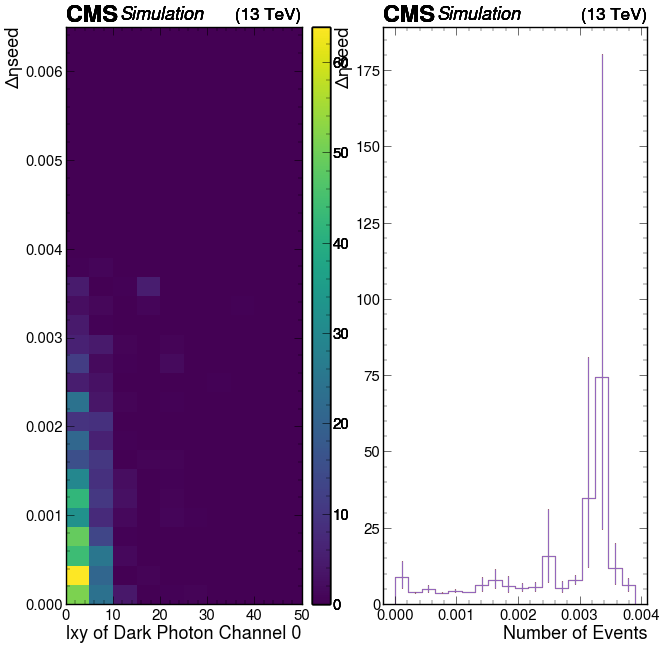

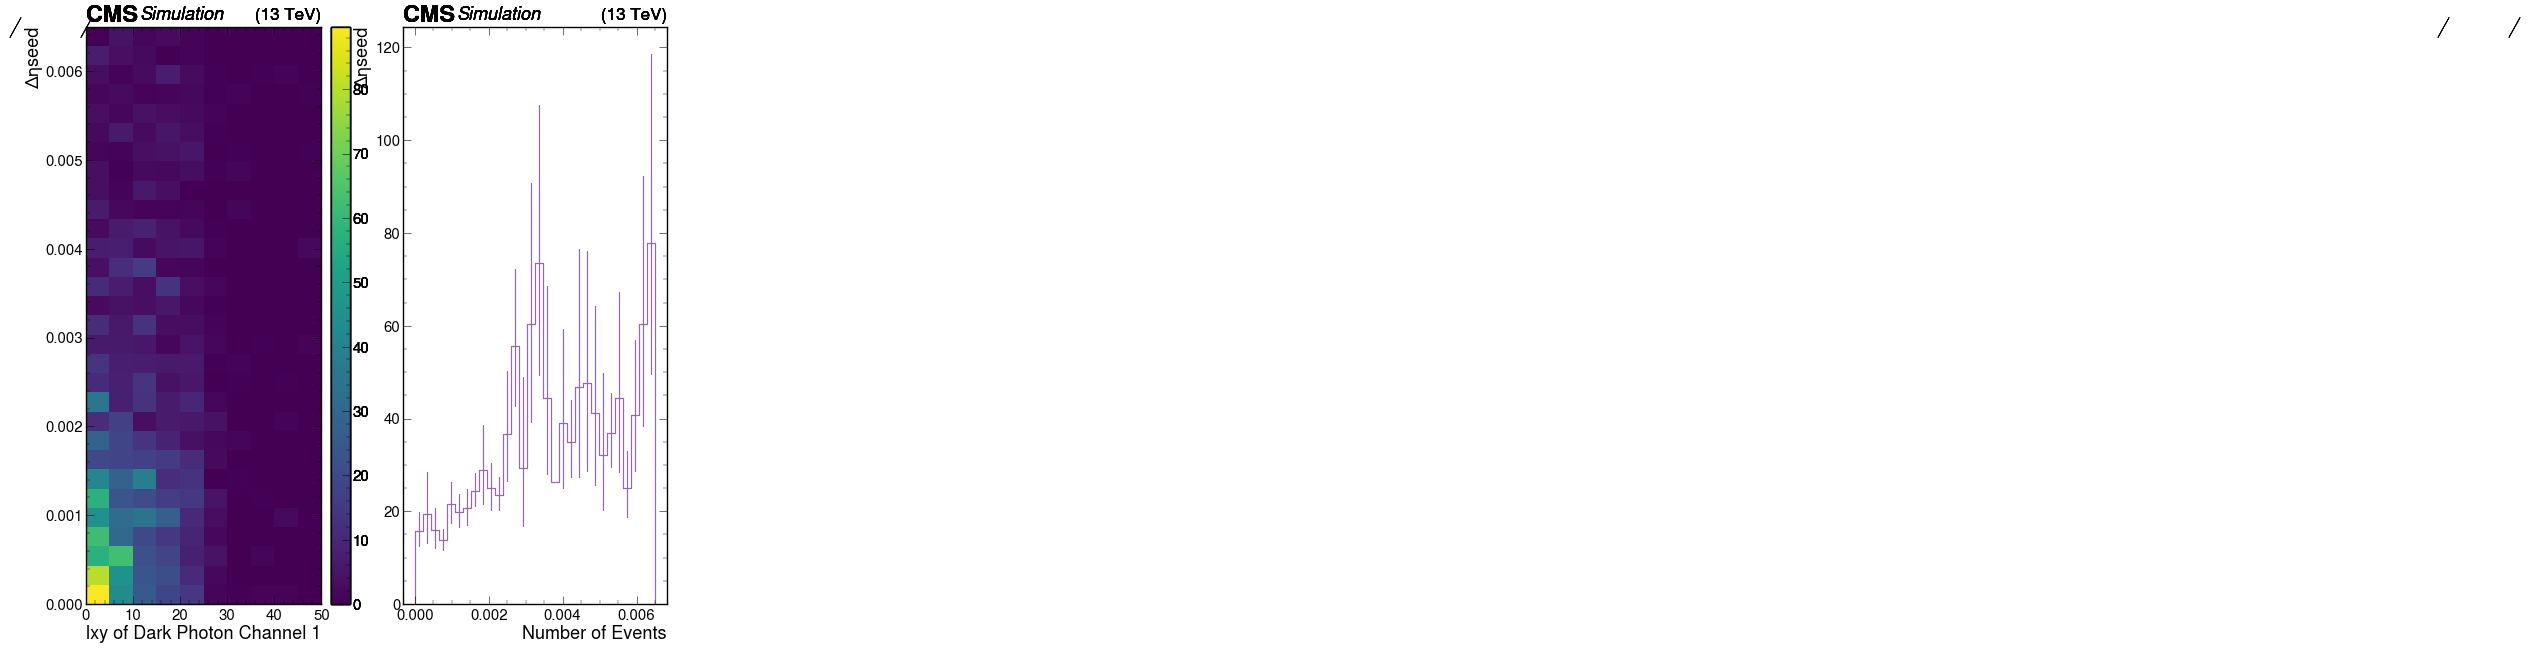

In [26]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Δηseed")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δηseed")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Δηseed")


The different colors are numbers of events, each distribution of the lxy is one projection.

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(0, 1, 'Δφin')

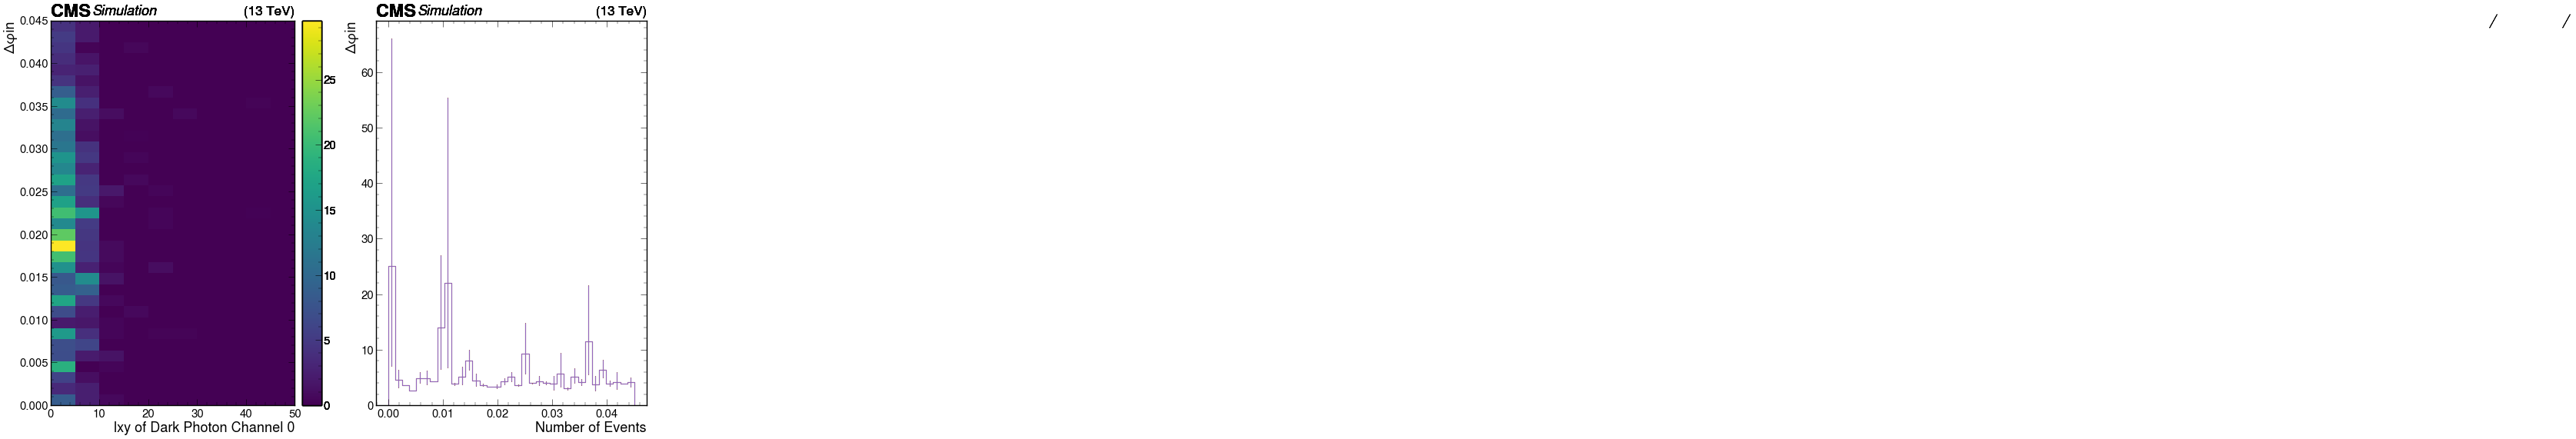

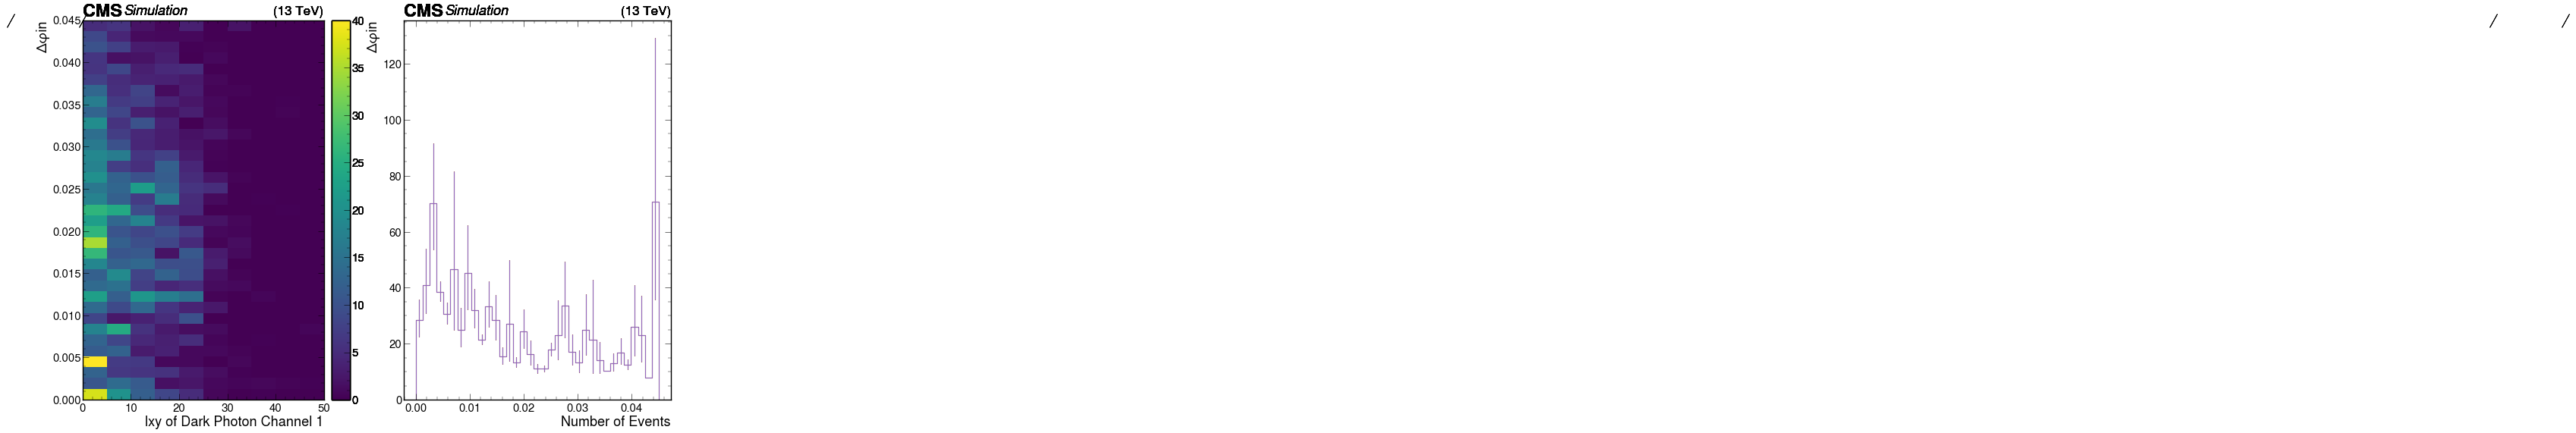

In [14]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δφin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Δφin")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δφin")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Δφin")



# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.


/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, '1/E − 1/p')

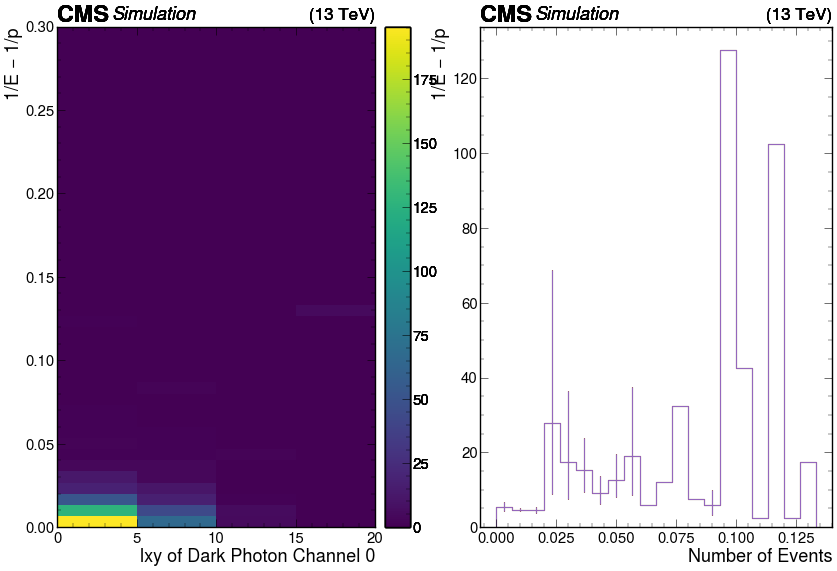

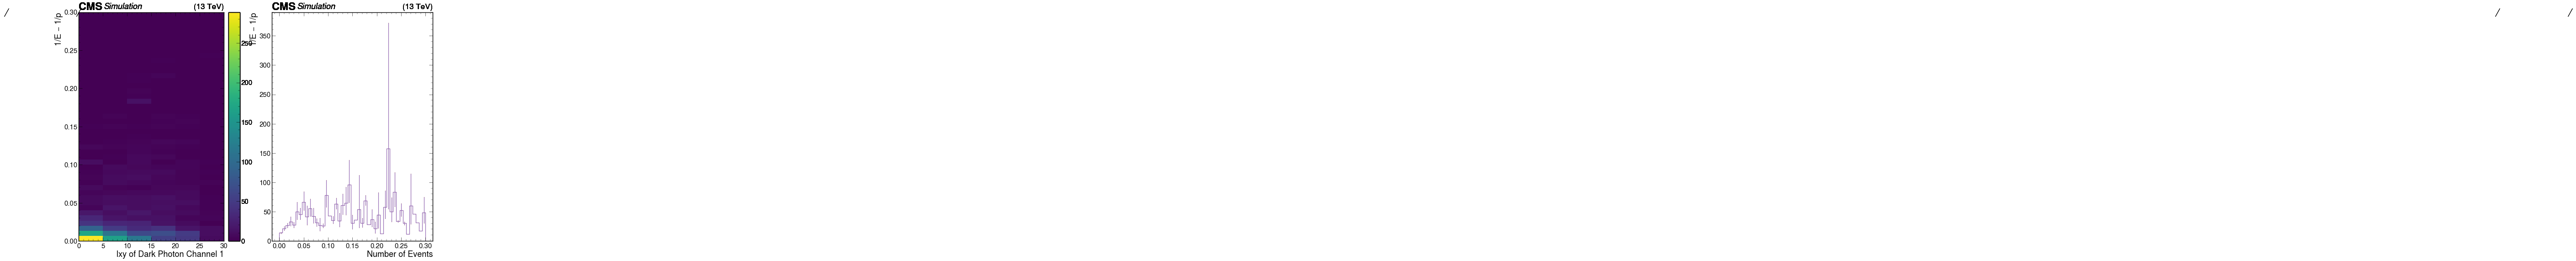

In [15]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("1/E − 1/p")
plt.xlim(0,20)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("1/E − 1/p")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("1/E − 1/p")
plt.xlim(0,30)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("1/E − 1/p")

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

Text(0, 1, 'Isolation')

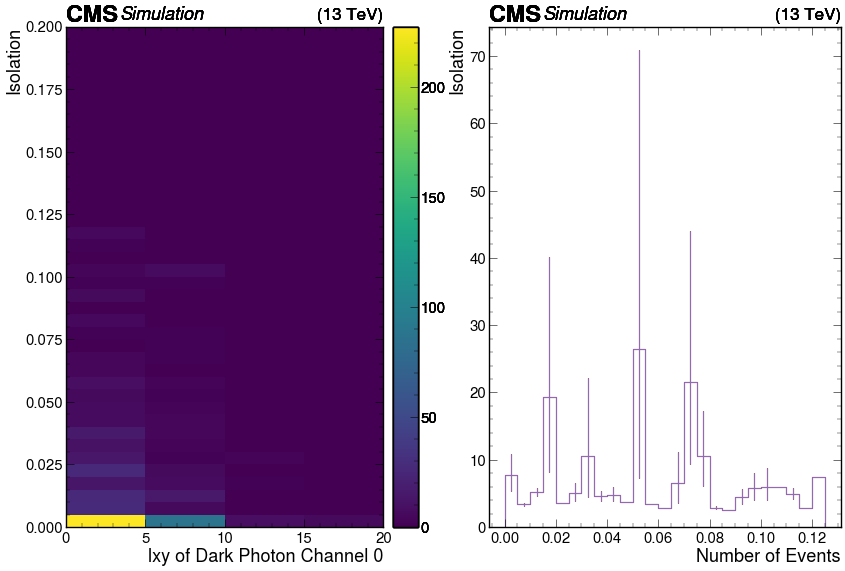

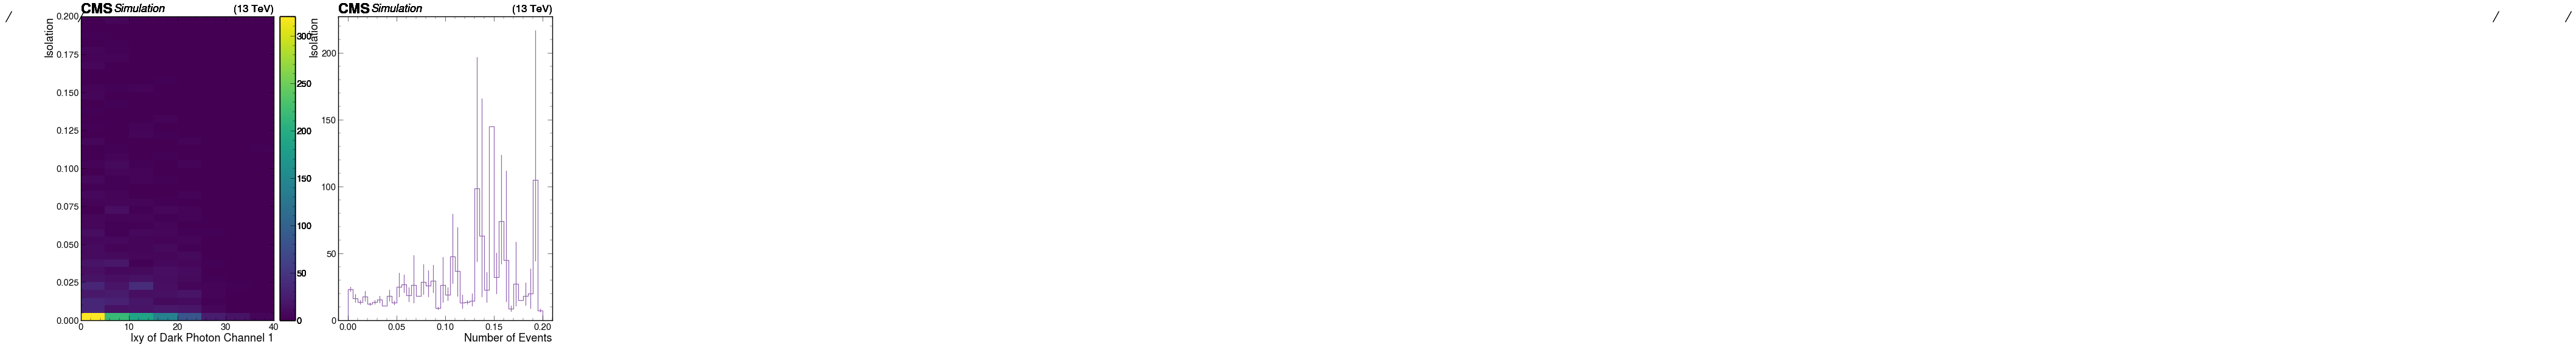

In [16]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation")
plt.xlim(0,20)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Isolation")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Isolation")
plt.xlim(0,40)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Isolation")


# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

Text(0, 1, 'σiηiη')

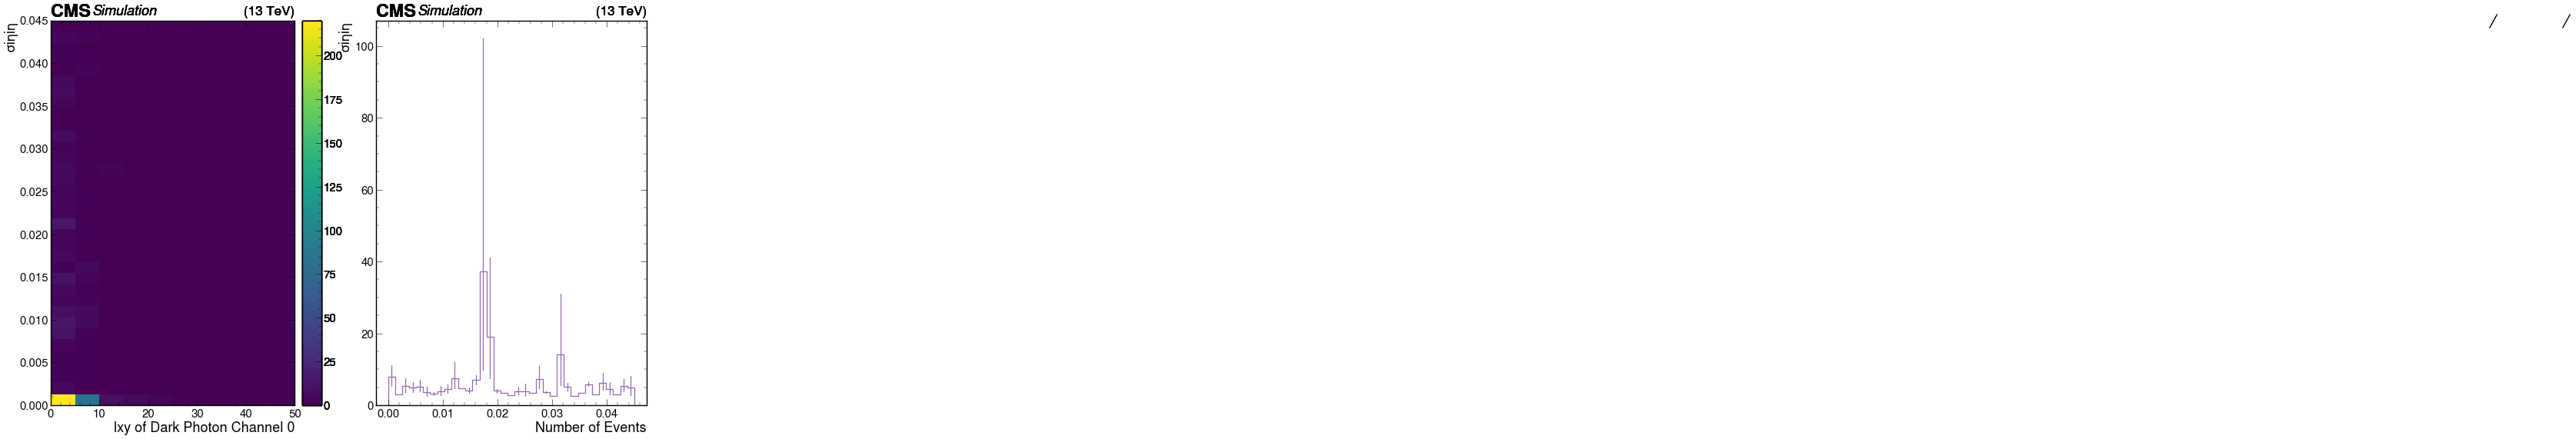

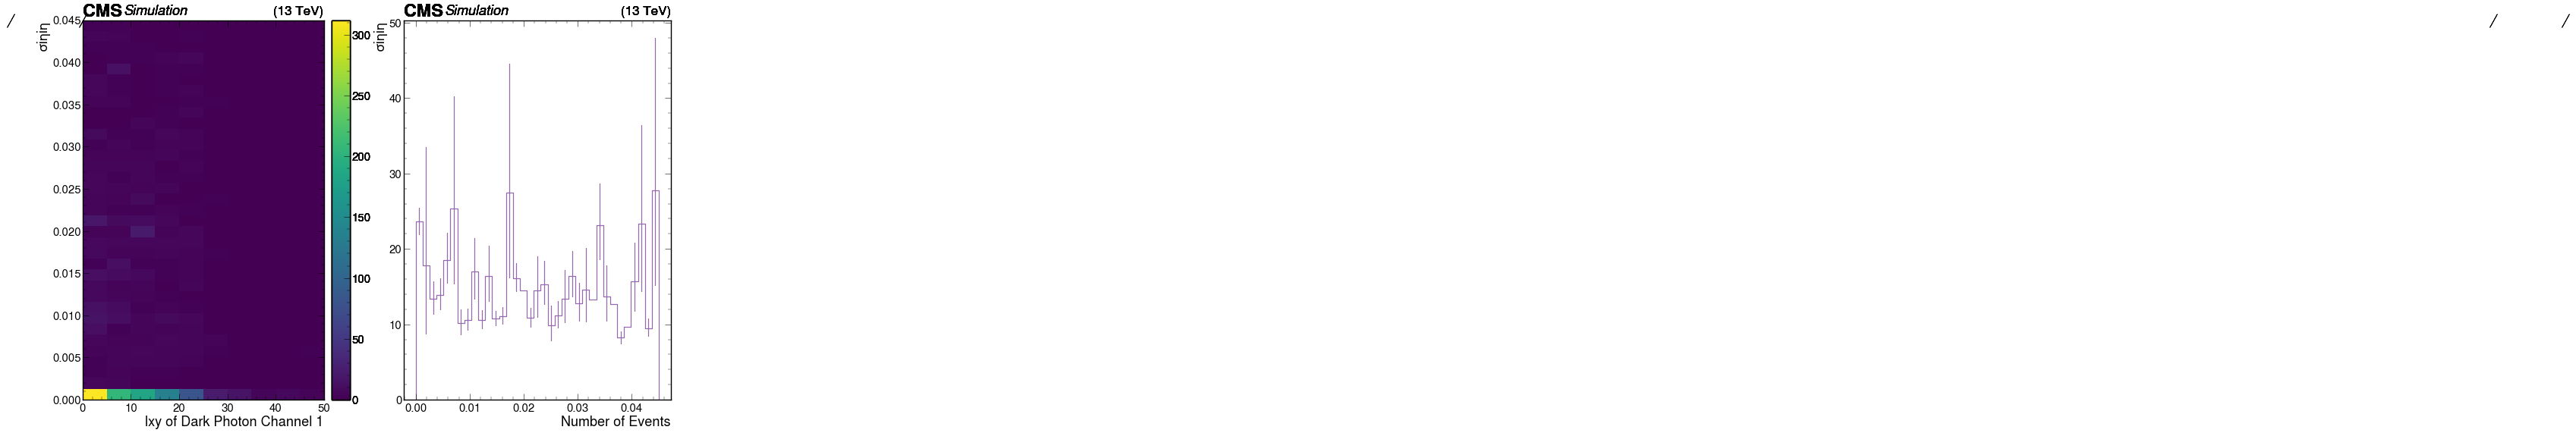

In [17]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("σiηiη")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("σiηiη")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("σiηiη")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("σiηiη")

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

Text(0, 1, 'Conversion veto')

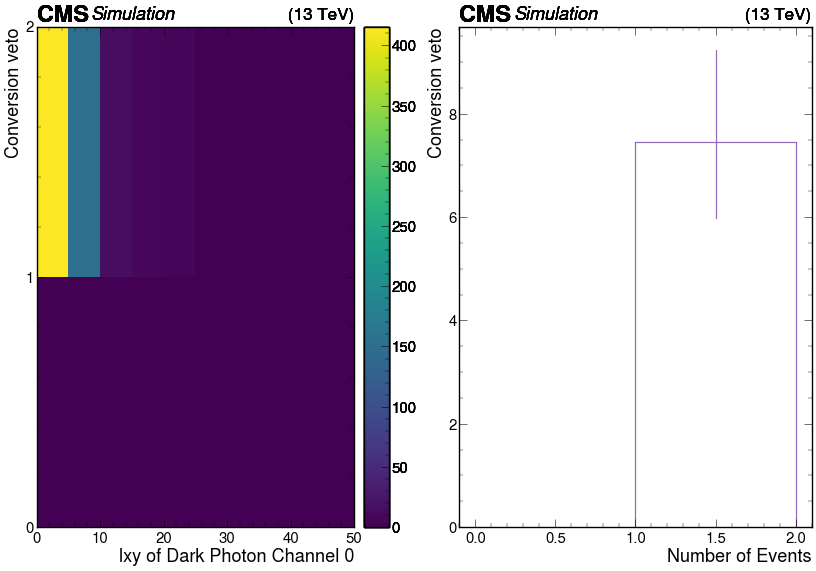

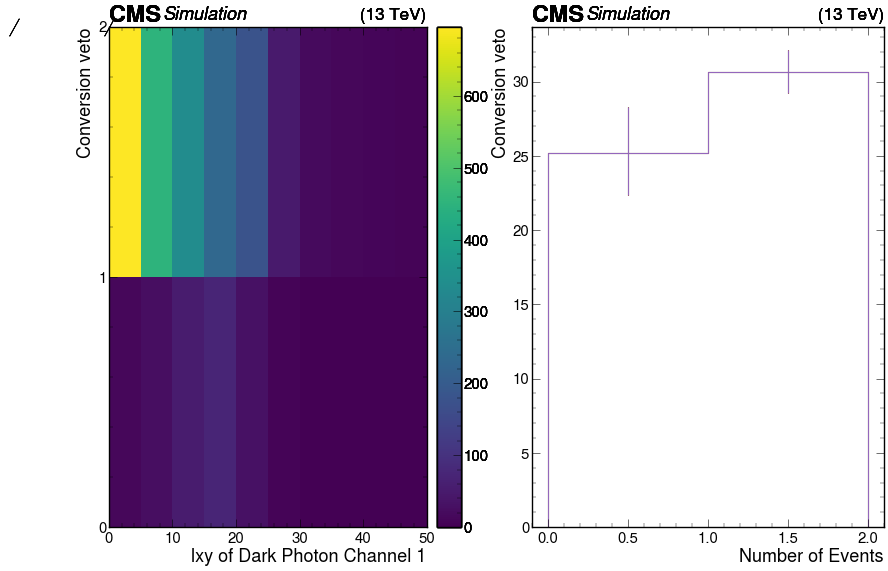

In [18]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Conversion veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Conversion veto")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Conversion veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("Conversion veto")

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in di

Text(0, 1, 'H/E')

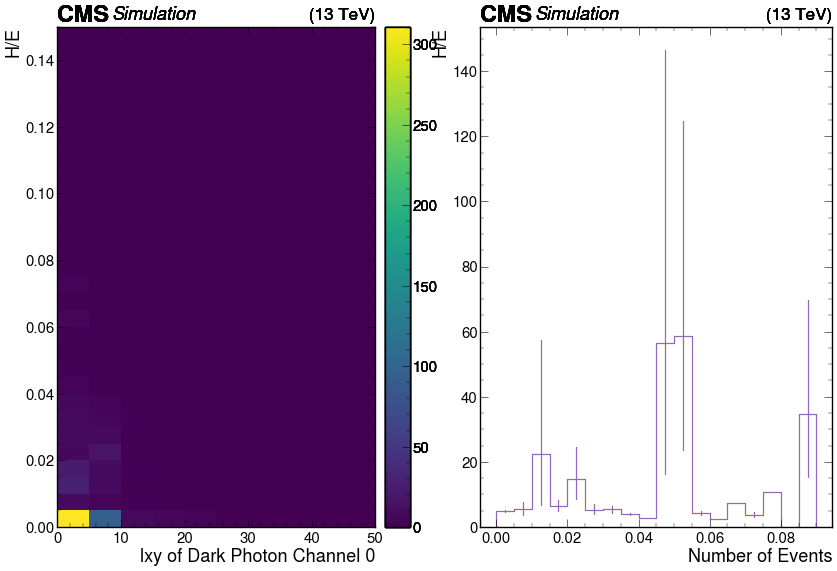

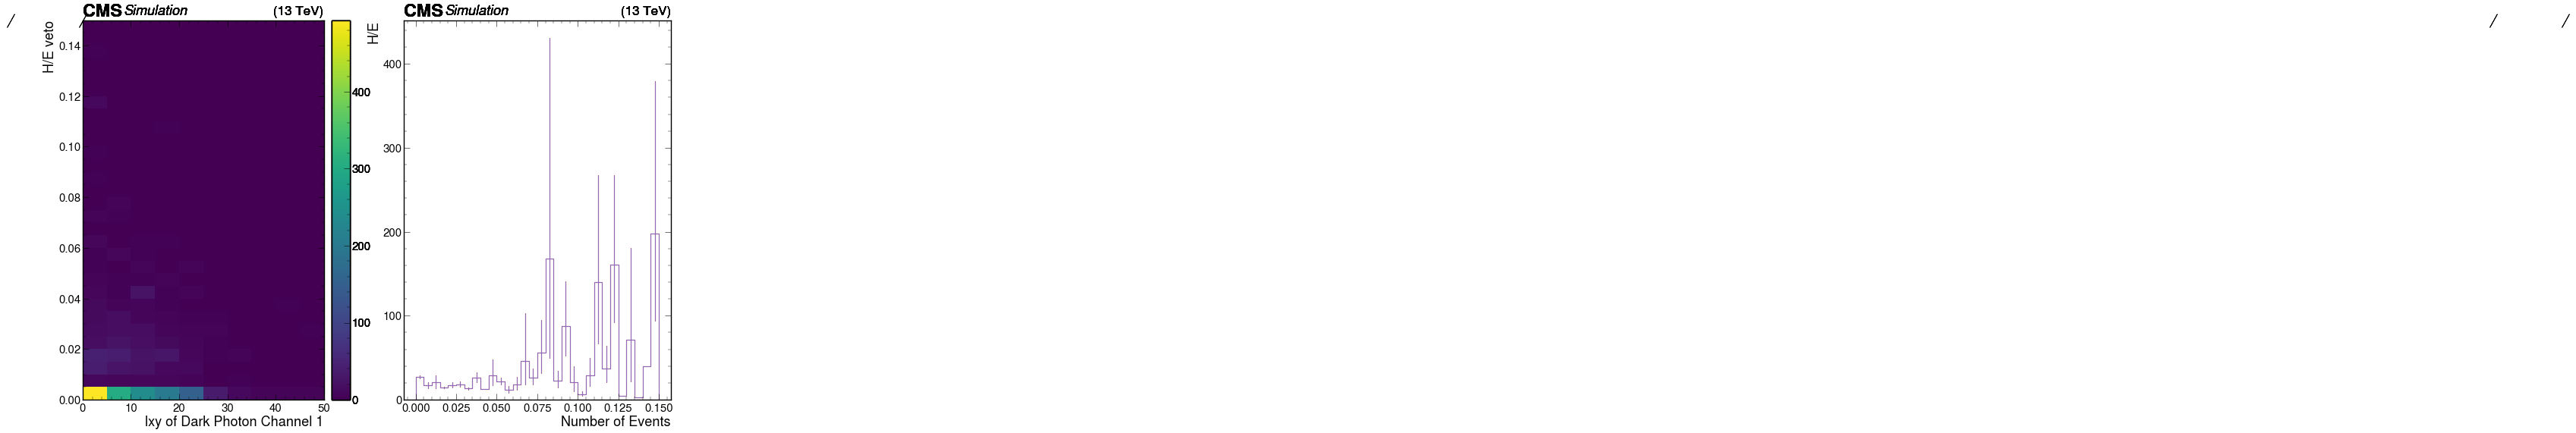

In [19]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[0], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("H/E")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("H/E veto")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.xlabel("Number of Events")
plt.ylabel("H/E")

# Expected missing inner hits:

number of missing hits expected for GSF track.

Text(1, 0, 'Expected Missing Inner Hits')

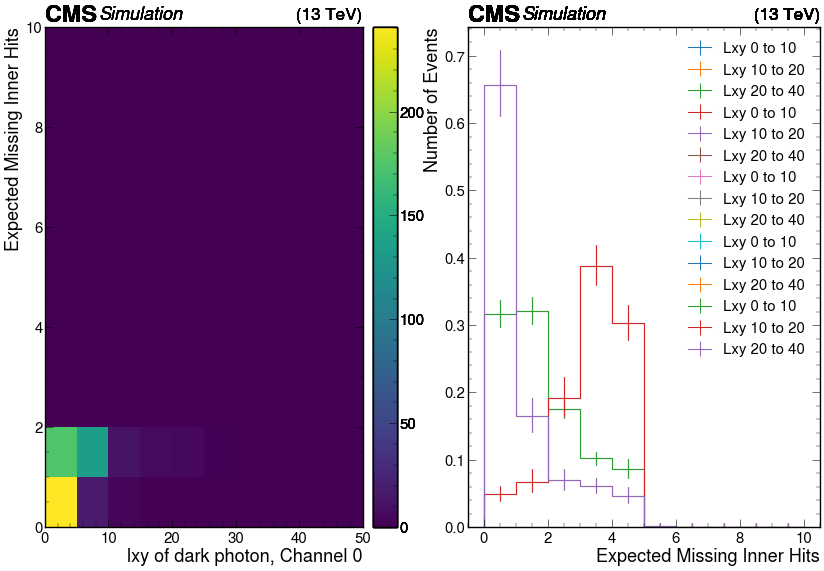

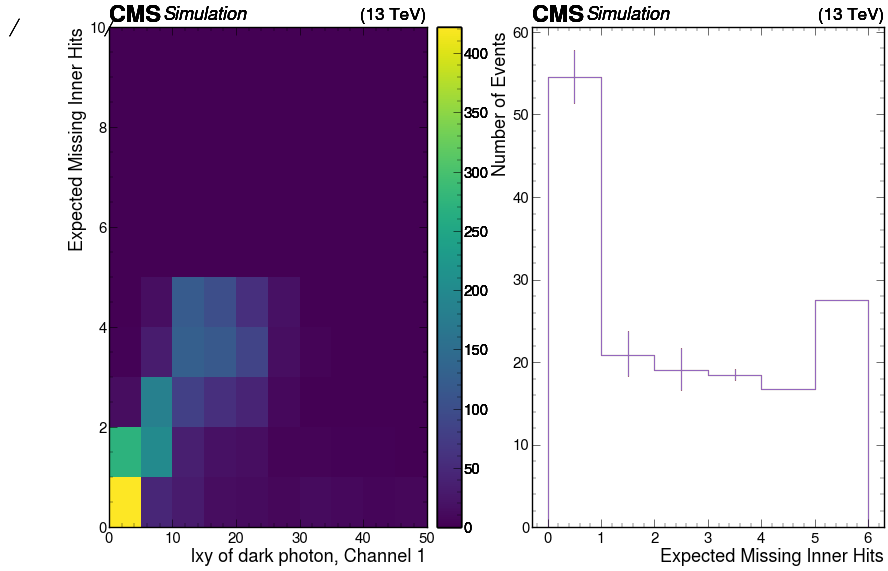

In [20]:
for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :, :], label = sample)
plt.xlabel("lxy of dark photon, Channel 0")
plt.ylabel("Expected Missing Inner Hits")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 3, sum),:], label = "Lxy 0 to 10",density=True)
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(3,5, sum),:], label = "Lxy 10 to 20",density=True)
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(5,101, sum),:], label = "Lxy 20 to 40",density=True)
plt.legend()
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Inner Hits")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 13))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :, :], label = sample)
plt.xlabel("lxy of dark photon, Channel 1")
plt.ylabel("Expected Missing Inner Hits")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :, :].profile("genA_lxy"), label = sample)
plt.ylabel("Number of Events ")
plt.xlabel("Expected Missing Inner Hits")